## Jupyter Notebook on investigation of the effect of change in oil price on economy of Kazakhstan

In [18]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import stats, norm
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
pd.pandas.set_option('display.max_columns', None)

%matplotlib inline

### Oil Price Dataset

In [19]:
#Source: The Global Economy
oilPrice=pd.read_csv("HistoricalData_1633786711091.csv")

In [20]:
oilPrice.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/08/2021,79.35,617865.0,78.86,80.11,78.63
1,10/07/2021,78.30,512312.0,77.00,78.89,74.96
2,10/06/2021,77.43,442865.0,79.04,79.78,76.83
3,10/05/2021,78.93,421795.0,77.58,79.48,77.47
4,10/04/2021,77.62,434907.0,75.90,78.38,75.32


In [21]:
oilPrice.shape

(2558, 6)

In [22]:
oilPrice.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [23]:
oilPrice.dtypes

Date           object
Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

<AxesSubplot:xlabel='Date'>

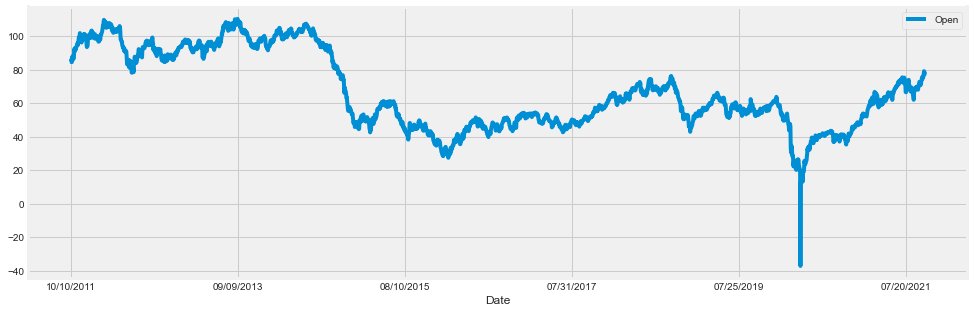

In [24]:
oilPrice = oilPrice[::-1]
oilPrice.plot(x="Date", y=["Open"], figsize=(15,5))

### Exchange Rate Dataset

In [25]:
#Source: Yahoo Finance
USDKZT=pd.read_csv("USDKZT=X.csv")

In [26]:
USDKZT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-10,175.979996,175.979996,175.979996,175.270004,175.270004,0.0
1,2011-10-11,175.750000,175.750000,175.750000,175.979996,175.979996,0.0
2,2011-10-12,175.779999,175.779999,175.779999,175.309998,175.309998,0.0
3,2011-10-13,175.619995,175.619995,175.619995,175.779999,175.779999,0.0
4,2011-10-14,175.610001,175.610001,175.610001,175.619995,175.619995,0.0


In [27]:
USDKZT.shape

(2610, 7)

In [28]:
USDKZT.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [29]:
USDKZT.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

<AxesSubplot:xlabel='Date'>

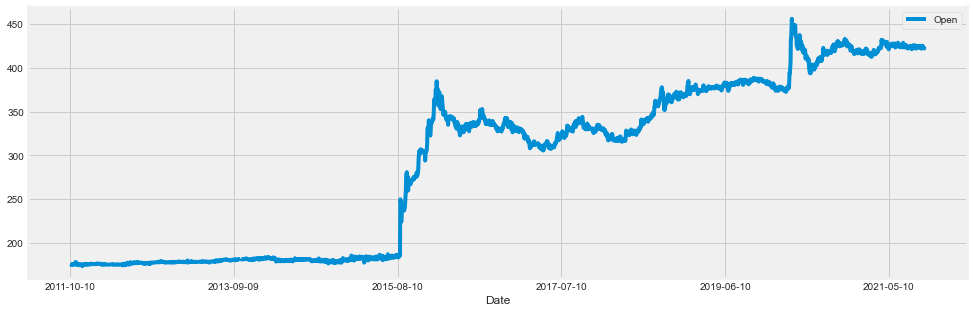

In [30]:
USDKZT.plot(x="Date", y=["Open"], figsize=(15,5))

In [31]:
#print Pearson's correlation
oilPrice["Open"].corr(USDKZT["Open"])

0.5854965391724819

### GDP Growth Rate Dataset

In [69]:
#Source: The World Bank
gdpGrowth=pd.read_csv("GDP_Growth.csv", sep=',')

In [70]:
gdpGrowth.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.078431,18.648649,12.129841,3.961402,7.962872,5.882353,7.307692,8.203903,2.547144,1.185788,7.046874,1.991986,1.238042,7.616588,-2.971257,-3.273646,1.975547,7.911563,1.214349,1.050608,1.800226,-0.090708,-10.519749,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.013078,0.328067,0.180223,3.337903,-0.178726,2.212603,3.936671,4.189368,2.648553,0.050826,-0.095421,-2.343192,-1.089417,2.051914,4.409975,5.570030,3.425412,1.789507,2.603876,3.197143,3.526480,3.992607,2.908004,5.656582,6.361804,6.688755,6.857304,4.572539,0.946811,5.152336,4.014183,1.972652,4.308370,3.982151,2.906749,2.002640,2.537432,2.461969,2.065470,-2.949407,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.848719,3.770212,7.272501,5.396356,4.049794,-1.787094,-9.546521,1.465741,15.491934,17.909,10.807508,3.145958,4.213394,10.249852,-2.164314,8.578717,4.726198,-2.194216,5.23079,1.995341,-6.932754,-3.350479,-6.534200,0.559360,5.551687,1.414759,1.448387,4.844282,2.272113,6.562921,1.121069,2.693959,-1.160468,-0.299641,1.927028,4.629048,4.234699,3.506516,1.421036,3.734635,5.212695,9.899591,5.518510,8.013486,5.848351,5.374463,5.530987,6.279223,6.274463,6.957010,4.848351,5.142964,6.104241,5.927350,2.745937,0.127595,2.318042,2.952230,3.190336,-0.884981,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.400001,0.000000,4.200001,6.000002,3.499999,2.900002,4.082749,6.128890,0.041621,-3.450099,0.991359,-5.838281,-23.983417,1.339363,15.000000,13.544370,7.274277,4.691146,2.181490,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,0.858713,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-5.399987,NaN


In [71]:
gdpGrowth.shape

(266, 66)

In [72]:
gdpGrowth.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [73]:
gdpGrowth.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [85]:
#Exctracting GDP Growth of Kazakhstan between 2011 and 2020
gdpGrowth = gdpGrowth.drop(gdpGrowth.iloc[:, 3:55], axis=1)[gdpGrowth["Country Name"]=="Kazakhstan"]
gdpGrowth = gdpGrowth.drop("Unnamed: 65", 1)
gdpGrowth

,Country Name,Country Code,Indicator Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
120,Kazakhstan,KAZ,GDP growth (annual %),7.4,4.8,6.0,4.2,1.2,1.1,4.1,4.1,4.5,-2.5


In [86]:
gdpGrowth = gdpGrowth.drop(gdpGrowth.iloc[:, 0:3], axis=1)
gdpGrowth

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
120,7.4,4.8,6.0,4.2,1.2,1.1,4.1,4.1,4.5,-2.5


In [87]:
#Transpose the dataframe gdpKZvalues
gdpGrowth = gdpGrowth.T

In [88]:
gdpGrowth.columns = ["% Annual GDP Growth"]
gdpGrowth

,% Annual GDP Growth
2011,7.4
2012,4.8
2013,6.0
2014,4.2
2015,1.2
2016,1.1
2017,4.1
2018,4.1
2019,4.5
2020,-2.5


<AxesSubplot:xlabel='year'>

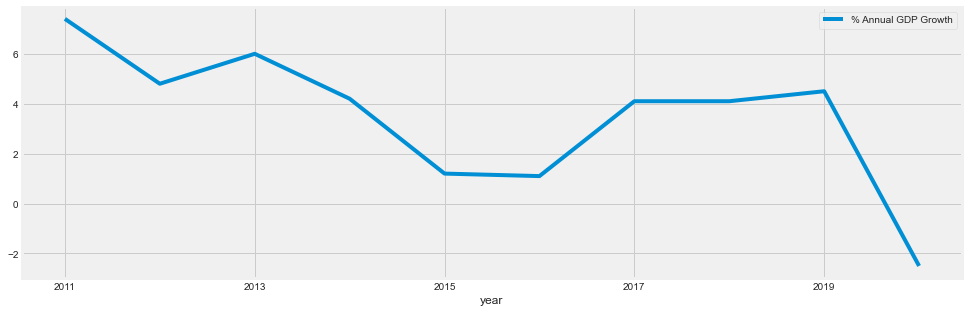

In [89]:
#Plotting Annual GDP Growth of Kazakhstan between 2011 and 2020
year = gdpGrowth.index.to_numpy()

gdpGrowth["year"]=year

pltGDP = gdpGrowth.plot(x="year", y="% Annual GDP Growth", figsize=(15,5))
pltGDP

### Foreign Direct Investment (FDI)

In [80]:
#Source: The World Bank
fdi=pd.read_csv("FDI.csv", sep=',')
fdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.223107,2.056259,0.186968,17.061706,21.183397,-3.858598,-1.655891,-5.875014,-0.418844,6.161619,12.913084,6.814224,27.138507,-6.828727,-13.901658,17.128058,7.904920,-4.743043,-8.915590,9.086772,-18.011109,0.687831,-0.424771,7.812573,19.145486,-12.415693,8.298529,8.979994,-0.971204,0.923412,5.253588,4.244634,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200539,0.905606,0.487450,0.292577,1.318412,0.426509,0.577183,0.070456,0.168911,-0.022825,0.333036,0.229702,0.379549,0.053777,0.435996,0.072255,0.291875,0.156769,0.281759,0.204384,0.037473,0.273110,0.172736,0.238969,0.510635,1.015231,0.797447,2.093067,1.589554,2.447425,1.558123,4.837769,2.503637,2.488972,1.866596,2.064945,1.271599,2.479684,3.243915,2.636684,1.667844,1.887098,2.595875,2.237111,2.816425,3.138428,1.940429,1.006292,1.520329,1.456457,NaN,NaN
2,Afghanistan,AFG,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013151,0.024575,0.009401,0.015577,NaN,NaN,0.001565,-0.008126,NaN,0.032450,0.247136,0.005174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.232991,1.280019,3.575816,4.364535,3.414004,1.935703,0.455360,0.451889,1.203117,0.293025,0.285441,0.239801,0.209665,0.884001,0.516606,0.274797,0.661572,0.124496,NaN,NaN
3,Africa Western and Central,AFW,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.562941,2.095359,1.862607,1.869109,1.069687,1.573802,0.866239,0.959633,0.875995,0.863457,-0.275516,0.431018,0.481129,0.569284,0.302854,0.785831,0.191695,0.945948,0.631293,1.891621,0.700628,0.710419,1.042555,1.844551,2.766994,0.874801,1.051850,1.115529,1.320733,1.562087,1.823393,2.178387,2.491128,2.571081,1.831411,2.987479,2.339430,2.821381,2.879197,3.580376,3.207298,3.651473,2.874317,2.333969,1.948825,2.056097,2.018233,2.582999,2.090054,2.111869,NaN,NaN
4,Angola,AGO,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630595,0.883175,2.085230,1.802577,1.094347,3.677923,3.306582,1.471083,1.492858,1.959263,-2.979635,NaN,NaN,NaN,5.022858,8.495021,2.398829,5.381376,17.120566,40.167162,9.623824,24.009117,11.406190,20.081014,9.329241,-3.526655,-0.072001,-1.368762,1.896315,3.136662,-3.851110,-2.704875,-1.143768,-5.208123,2.510095,8.630605,-0.177523,-6.057209,-6.369877,-4.583547,NaN,NaN


In [81]:
fdi.shape

(266, 66)

In [83]:
fdi.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [82]:
fdi.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [84]:
#Exctracting FDI of Kazakhstan between 2011 and 2020
fdi = fdi.drop(fdi.iloc[:, 3:55], axis=1)[fdi["Country Name"]=="Kazakhstan"]
fdi = fdi.drop("Unnamed: 65", 1)
fdi

,Country Name,Country Code,Indicator Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
120,Kazakhstan,KAZ,"Foreign direct investment, net inflows (% of GDP)",7.143509,6.561648,4.230698,3.300632,3.567373,12.544561,2.82522,0.046509,1.827873,NaN


In [90]:
fdi = fdi.drop(fdi.iloc[:, 0:3], axis=1)
fdi

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
120,7.143509,6.561648,4.230698,3.300632,3.567373,12.544561,2.82522,0.046509,1.827873,NaN


In [91]:
#Transpose the dataframe fdi
fdi = fdi.T

In [92]:
fdi.columns = ["FDI (% of GDP)"]
fdi

,FDI (% of GDP)
2011,7.143509
2012,6.561648
2013,4.230698
2014,3.300632
2015,3.567373
2016,12.544561
2017,2.825220
2018,0.046509
2019,1.827873
2020,NaN


<AxesSubplot:xlabel='year'>

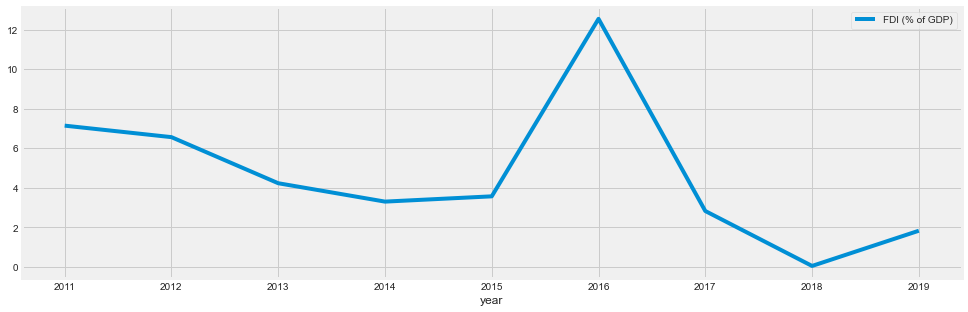

In [93]:
#Plotting FDI of Kazakhstan between 2011 and 2020
year = fdi.index.to_numpy()

fdi["year"]=year

pltFDI = fdi.plot(x="year", y="FDI (% of GDP)", figsize=(15,5))
pltFDI

### Unemployement Rate

In [94]:
#Source: The World Bank
unempRate=pd.read_csv("Unemployment_Rate.csv", sep=',')
unempRate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.08,NaN,NaN,6.45,NaN,NaN,7.45,NaN,NaN,6.92,6.9,NaN,NaN,NaN,NaN,NaN,5.71,NaN,NaN,10.60,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.49,NaN,NaN,NaN,1.69,NaN,7.910000,NaN,NaN,11.180000,NaN,NaN,11.71,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.343155,NaN,NaN,7.097686,NaN,NaN,NaN,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,14.9,18.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.64,NaN,NaN,NaN,NaN,3.78,9.43,7.36,NaN,NaN,9.580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
unempRate.shape

(266, 66)

In [96]:
unempRate.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [97]:
unempRate.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [98]:
#Exctracting Unemployment Rate of Kazakhstan between 2011 and 2020
unempRate = unempRate.drop(unempRate.iloc[:, 3:55], axis=1)[unempRate["Country Name"]=="Kazakhstan"]
unempRate = unempRate.drop("Unnamed: 65", 1)
unempRate

,Country Name,Country Code,Indicator Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
120,Kazakhstan,KAZ,"Unemployment, total (% of total labor force) (...",5.39,5.29,5.2,5.06,4.93,4.96,4.9,4.85,4.8,4.89


In [99]:
unempRate = unempRate.drop(unempRate.iloc[:, 0:3], axis=1)
unempRate

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
120,5.39,5.29,5.2,5.06,4.93,4.96,4.9,4.85,4.8,4.89


In [100]:
#Transpose the dataframe unempRate
unempRate = unempRate.T

In [101]:
unempRate.columns = ["Unemployment Rate"]
unempRate

,Unemployment Rate
2011,5.39
2012,5.29
2013,5.20
2014,5.06
2015,4.93
2016,4.96
2017,4.90
2018,4.85
2019,4.80
2020,4.89


<AxesSubplot:xlabel='year'>

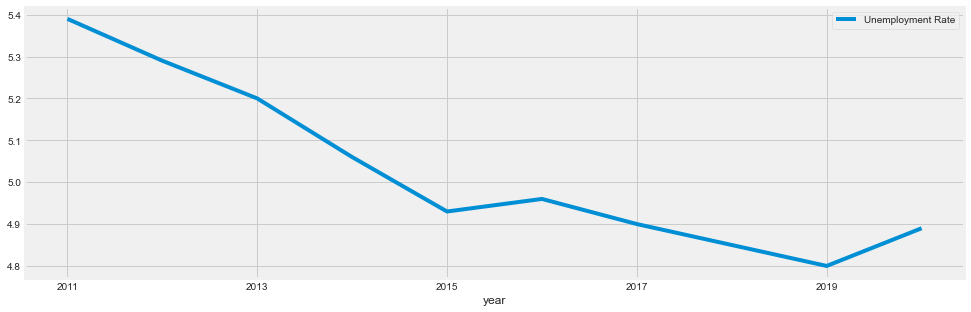

In [102]:
#Plotting Unemployment Rate of Kazakhstan between 2011 and 2020
year = unempRate.index.to_numpy()

unempRate["year"]=year

pltunempRate = unempRate.plot(x="year", y="Unemployment Rate", figsize=(15,5))
pltunempRate

### Inflation 

In [122]:
#Source: The World Bank
inflRate=pd.read_csv("Inflation.csv", sep=',')
inflRate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,5.836688,5.555556,3.873375,5.215560,6.311080,3.361391,3.225288,2.999948,1.869489,2.280372,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,3.608024,5.392568,8.955987,-2.135429,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.598394,15.224099,11.216477,14.238055,12.526893,15.06985,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522254,12.558202,12.457914,17.678100,16.167612,13.135661,14.852815,12.288591,9.706586,10.249599,7.495259,7.819865,8.601485,5.840354,8.763752,7.449700,5.023421,8.558038,8.898164,8.450775,12.566645,8.954218,5.537538,8.971206,9.158707,5.746949,5.370290,5.250171,6.594604,6.399343,4.720811,3.923372,4.978097,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.686269,6.784597,8.680571,26.418664,-6.811161,2.178538,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.799211,12.059765,10.671937,11.250000,7.354926,5.950965,0.248789,2.523659,0.869287,1.057361,1.741888,-0.062999,0.553456,31.841017,10.563289,4.914240,3.997142,4.471125,0.372266,2.530775,4.361529,3.188693,1.760904,0.694336,5.631634,4.415900,3.607368,8.449722,3.282440,1.784844,4.018699,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.425007,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.783784,299.509804,1378.527607,949.792531,2666.450593,4145.105982,219.176721,107.284822,248.195902,324.996872,152.561022,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN


In [123]:
inflRate.shape

(266, 66)

In [124]:
inflRate.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [125]:
inflRate.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

In [126]:
#Exctracting Unemployment Rate of Kazakhstan between 2011 and 2020
inflRate = inflRate.drop(inflRate.iloc[:, 3:55], axis=1)[inflRate["Country Name"]=="Kazakhstan"]
inflRate = inflRate.drop("Unnamed: 65", 1)
inflRate

,Country Name,Country Code,Indicator Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
120,Kazakhstan,KAZ,"Inflation, consumer prices (annual %)",8.424888,5.097915,5.846409,6.706578,6.665776,14.546024,7.440004,6.019131,5.245477,6.749002


In [127]:
inflRate = inflRate.drop(inflRate.iloc[:, 0:3], axis=1)
inflRate

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
120,8.424888,5.097915,5.846409,6.706578,6.665776,14.546024,7.440004,6.019131,5.245477,6.749002


In [128]:
inflRate = inflRate.T

In [129]:
inflRate.columns = ["Inflation Rate"]
inflRate

,Inflation Rate
2011,8.424888
2012,5.097915
2013,5.846409
2014,6.706578
2015,6.665776
2016,14.546024
2017,7.440004
2018,6.019131
2019,5.245477
2020,6.749002


<AxesSubplot:xlabel='year'>

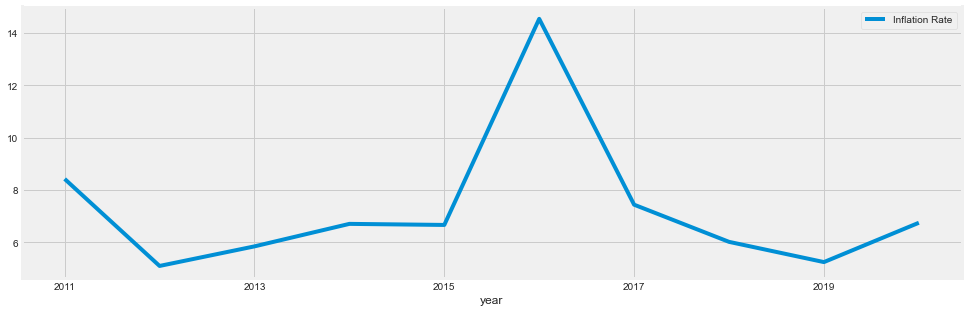

In [130]:
#Plotting Inflation Rate of Kazakhstan between 2011 and 2020
year = inflRate.index.to_numpy()

inflRate["year"]=year

pltinflRate = inflRate.plot(x="year", y="Inflation Rate", figsize=(15,5))
pltinflRate